## Part 2

# Fetch all coins' last 6 months' data on a 24H timeframe from Binance API - store it in DB

In [11]:
%%capture --no-display
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas

In [12]:
# Get coins information from PART-1 
import pandas as pd
# Load the Binance all pairs (1).csv file to a dataframe
usdt_pairs_df = pd.read_csv("./input_files/Binance all pairs (1).csv")
usdt_pairs_df['USDT Pairs'].to_list()

['ZRX/USDT',
 'ZIL/USDT',
 'ZEN/USDT',
 'ZEC/USDT',
 'YGG/USDT',
 'YFIUP/USDT',
 'YFII/USDT',
 'YFIDOWN/USDT',
 'YFI/USDT',
 'XZC/USDT',
 'XVS/USDT',
 'XVG/USDT',
 'XTZUP/USDT',
 'XTZDOWN/USDT',
 'XTZ/USDT',
 'XRPUP/USDT',
 'XRPDOWN/USDT',
 'XRPBULL/USDT',
 'XRPBEAR/USDT',
 'XRP/USDT',
 'XNO/USDT',
 'XMR/USDT',
 'XLMUP/USDT',
 'XLMDOWN/USDT',
 'XLM/USDT',
 'XEM/USDT',
 'XEC/USDT',
 'WTC/USDT',
 'WRX/USDT',
 'WOO/USDT',
 'WNXM/USDT',
 'WING/USDT',
 'WIN/USDT',
 'WAXP/USDT',
 'WAVES/USDT',
 'WAN/USDT',
 'VTHO/USDT',
 'VOXEL/USDT',
 'VITE/USDT',
 'VIDT/USDT',
 'VIB/USDT',
 'VGX/USDT',
 'VET/USDT',
 'VEN/USDT',
 'UTK/USDT',
 'UST/USDT',
 'USDSB/USDT',
 'USDS/USDT',
 'USDP/USDT',
 'USDC/USDT',
 'UNIUP/USDT',
 'UNIDOWN/USDT',
 'UNI/USDT',
 'UNFI/USDT',
 'UMA/USDT',
 'TWT/USDT',
 'TVK/USDT',
 'TUSD/USDT',
 'TRXUP/USDT',
 'TRXDOWN/USDT',
 'TRX/USDT',
 'TRU/USDT',
 'TROY/USDT',
 'TRIBE/USDT',
 'TRB/USDT',
 'TORN/USDT',
 'TOMO/USDT',
 'TLM/USDT',
 'TKO/USDT',
 'THETA/USDT',
 'TFUEL/USDT',
 'TCT/

# Fetch all coins' last 6 months' data on a 24H timeframe from Binance API - store it in DB

In [13]:
import requests
import time
# Binance API endpoint for getting klines data
klines_url = 'https://api.binance.com/api/v3/klines'
# List of coins to fetch data for
coins = usdt_pairs_df['USDT Pairs']
# Dictionary to store all data
all_coin_data_df = pd.DataFrame()
# adding column name to the respective columns
columns =[
    'Kline open time', 'Open price', 'High price', "Low price", "Close price", "Volume", "Kline close time", "Quote asset volume", "Number of trades",
    "Taker buy base asset volume", "Taker buy quote asset volume", "Unused field. Ignore."
    ]
# Loop through each coin and fetch data
for coin in coins:
    # Set parameters for API request
    params = {
        'symbol': coin.replace("/",""),
        'interval': '1d', # Per day
        'limit': 180    # 30 * 6
    }
    # Make API request
    response = requests.get(klines_url, params=params)
    # Parse response JSON
    data = response.json()
    coin_df = pd.DataFrame(data, columns=columns)
    coin_df["Coin"] = coin
    all_coin_data_df = pd.concat([all_coin_data_df, coin_df], axis=0)
    time.sleep(1)
all_coin_data_df

,Kline open time,Open price,High price,Low price,Close price,Volume,Kline close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Unused field. Ignore.,Coin
0,1667260800000,0.25460000,0.25840000,0.25130000,0.25360000,2549748.00000000,1667347199999,650874.87250000,4628,1270454.00000000,324409.69780000,0,ZRX/USDT
1,1667347200000,0.25360000,0.26270000,0.24390000,0.25050000,12911850.00000000,1667433599999,3284319.12230000,16798,6429016.00000000,1636393.81040000,0,ZRX/USDT
2,1667433600000,0.25060000,0.26670000,0.24960000,0.26260000,8747303.00000000,1667519999999,2285645.81470000,13264,4269176.00000000,1115772.10000000,0,ZRX/USDT
3,1667520000000,0.26260000,0.28320000,0.26140000,0.28130000,11131195.00000000,1667606399999,3036566.64980000,18091,5509059.00000000,1503802.10950000,0,ZRX/USDT
4,1667606400000,0.28120000,0.28690000,0.26930000,0.27420000,8638581.00000000,1667692799999,2410938.92950000,16571,4262459.00000000,1189954.64640000,0,ZRX/USDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1682380800000,0.48700000,0.49600000,0.47100000,0.49400000,2336695.90000000,1682467199999,1119614.63610000,6228,1134999.90000000,544106.49790000,0,1INCH/USDT
176,1682467200000,0.49400000,0.51000000,0.45500000,0.48000000,4378243.10000000,1682553599999,2129181.10970000,12098,2161668.70000000,1050129.69350000,0,1INCH/USDT
177,1682553600000,0.47900000,0.49600000,0.47600000,0.49000000,2693679.10000000,1682639999999,1308917.71940000,8220,1460957.30000000,709544.63760000,0,1INCH/USDT
178,1682640000000,0.48900000,0.49100000,0.47600000,0.48300000,2330769.90000000,1682726399999,1122948.56480000,6167,1100141.20000000,530043.86330000,0,1INCH/USDT


In [14]:
# Prepare database
import sqlite3
with sqlite3.connect('./output_files/binance_data.db') as sqliteConnection:
    all_coin_data_df.to_sql(name="all_coin_data", con=sqliteConnection, if_exists="replace")
    pd.read_sql('select * from all_coin_data', sqliteConnection)

/home/asifr/.local/lib/python3.10/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [3]:
# To check whether the data is stored in the database we call perform the following
with sqlite3.connect('./output_files/binance_data.db') as sqliteConnection:
    a=pd.read_sql('select * from all_coin_data', sqliteConnection)
    print(a)

       index  Kline open time  Open price  High price   Low price Close price  \
0          0    1667260800000  0.25460000  0.25840000  0.25130000  0.25360000   
1          1    1667347200000  0.25360000  0.26270000  0.24390000  0.25050000   
2          2    1667433600000  0.25060000  0.26670000  0.24960000  0.26260000   
3          3    1667520000000  0.26260000  0.28320000  0.26140000  0.28130000   
4          4    1667606400000  0.28120000  0.28690000  0.26930000  0.27420000   
...      ...              ...         ...         ...         ...         ...   
73590    175    1682380800000  0.48700000  0.49600000  0.47100000  0.49400000   
73591    176    1682467200000  0.49400000  0.51000000  0.45500000  0.48000000   
73592    177    1682553600000  0.47900000  0.49600000  0.47600000  0.49000000   
73593    178    1682640000000  0.48900000  0.49100000  0.47600000  0.48300000   
73594    179    1682726400000  0.48300000  0.50300000  0.48000000  0.50100000   

                  Volume  K

# Calculate daily %change of all coins - (current close-previous close)/previous close

In [15]:
# Calculate daily percentage change for each coin
all_coin_data_df = all_coin_data_df.astype({"Close price": float})
all_coin_data_df['Daily Close price pct_change'] = all_coin_data_df['Close price'].pct_change()
# To be used for Part 3
all_coin_data_df.to_csv("./output_files/all_coin_data.csv")
all_coin_data_df

,Kline open time,Open price,High price,Low price,Close price,Volume,Kline close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Unused field. Ignore.,Coin,Daily Close price pct_change
0,1667260800000,0.25460000,0.25840000,0.25130000,0.2536,2549748.00000000,1667347199999,650874.87250000,4628,1270454.00000000,324409.69780000,0,ZRX/USDT,NaN
1,1667347200000,0.25360000,0.26270000,0.24390000,0.2505,12911850.00000000,1667433599999,3284319.12230000,16798,6429016.00000000,1636393.81040000,0,ZRX/USDT,-0.012224
2,1667433600000,0.25060000,0.26670000,0.24960000,0.2626,8747303.00000000,1667519999999,2285645.81470000,13264,4269176.00000000,1115772.10000000,0,ZRX/USDT,0.048303
3,1667520000000,0.26260000,0.28320000,0.26140000,0.2813,11131195.00000000,1667606399999,3036566.64980000,18091,5509059.00000000,1503802.10950000,0,ZRX/USDT,0.071211
4,1667606400000,0.28120000,0.28690000,0.26930000,0.2742,8638581.00000000,1667692799999,2410938.92950000,16571,4262459.00000000,1189954.64640000,0,ZRX/USDT,-0.025240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1682380800000,0.48700000,0.49600000,0.47100000,0.4940,2336695.90000000,1682467199999,1119614.63610000,6228,1134999.90000000,544106.49790000,0,1INCH/USDT,0.014374
176,1682467200000,0.49400000,0.51000000,0.45500000,0.4800,4378243.10000000,1682553599999,2129181.10970000,12098,2161668.70000000,1050129.69350000,0,1INCH/USDT,-0.028340
177,1682553600000,0.47900000,0.49600000,0.47600000,0.4900,2693679.10000000,1682639999999,1308917.71940000,8220,1460957.30000000,709544.63760000,0,1INCH/USDT,0.020833
178,1682640000000,0.48900000,0.49100000,0.47600000,0.4830,2330769.90000000,1682726399999,1122948.56480000,6167,1100141.20000000,530043.86330000,0,1INCH/USDT,-0.014286


# Group coins by category 

In [16]:
# Load the crypto tracker data
crypto_tracker_csv = pd.read_csv("./input_files/Crypto - Tracker - Sheet7.csv")
# Load the categories data
categories_csv = pd.read_csv("./input_files/categories.csv")
# Create an empty dictionary to hold the coins by category
coins_by_category = {}
for category in categories_csv['name']:
    # Get the coins in the current category and
    # Add the coins to the dictionary with the category name as the key, only if there are any coins in the category that are also present in coins_filtered
    coins_by_category[category] = crypto_tracker_csv[crypto_tracker_csv['Category'] == category]['symbol'].tolist()
# Print the coins by category
coins_by_category

{'Aave Tokens': [],
 'Algorand Ecosystem': [],
 'Analytics': ['grt',
  'cqt',
  'dext',
  'prq',
  'vib',
  'push',
  'radar',
  'bdp',
  'dobo',
  'glq',
  'jdb',
  'oja',
  'bird',
  'uwl',
  'vision',
  'chart',
  'data',
  'astro',
  'krw'],
 'Aptos Ecosystem': [],
 'Arbitrum Ecosystem': [],
 'Arbitrum Nova Ecosystem': [],
 'Artificial Intelligence (AI)': [],
 'Asset-backed Tokens': [],
 'Asset Manager': [],
 'Augmented Reality': [],
 'Automated Market Maker (AMM)': [],
 'Avalanche Ecosystem': [],
 'Axie Infinity': [],
 'Big Data': ['cqt',
  'dock',
  'mdt',
  'gxc',
  'instar',
  'data',
  'xdata',
  'fida',
  'orai',
  'amo',
  'equad',
  'scp',
  'bdp',
  'hart',
  'rating',
  'ncdt',
  'zco',
  'ize',
  'iag',
  'elama',
  'dx',
  'clbk'],
 'Binance Launchpool': [],
 'BNB Chain Ecosystem': [],
 'Business Platform': ['vet',
  'glm',
  'iotx',
  'dexe',
  'cqt',
  'shr',
  'ogn',
  'cre',
  'mln',
  'dnt',
  'avt',
  'es',
  'six',
  'oxen',
  'go',
  'aria20',
  'apm',
  'mitx',

In [17]:
# Filter the empty categories and transform the list
transfromed_coins_by_category = dict()
for catergory, coins_in_category in coins_by_category.items():
    if coins_in_category:
        transfromed_coins_by_category[catergory] = [coin.upper()+"/USDT" for coin in coins_in_category]
transfromed_coins_by_category

{'Analytics': ['GRT/USDT',
  'CQT/USDT',
  'DEXT/USDT',
  'PRQ/USDT',
  'VIB/USDT',
  'PUSH/USDT',
  'RADAR/USDT',
  'BDP/USDT',
  'DOBO/USDT',
  'GLQ/USDT',
  'JDB/USDT',
  'OJA/USDT',
  'BIRD/USDT',
  'UWL/USDT',
  'VISION/USDT',
  'CHART/USDT',
  'DATA/USDT',
  'ASTRO/USDT',
  'KRW/USDT'],
 'Big Data': ['CQT/USDT',
  'DOCK/USDT',
  'MDT/USDT',
  'GXC/USDT',
  'INSTAR/USDT',
  'DATA/USDT',
  'XDATA/USDT',
  'FIDA/USDT',
  'ORAI/USDT',
  'AMO/USDT',
  'EQUAD/USDT',
  'SCP/USDT',
  'BDP/USDT',
  'HART/USDT',
  'RATING/USDT',
  'NCDT/USDT',
  'ZCO/USDT',
  'IZE/USDT',
  'IAG/USDT',
  'ELAMA/USDT',
  'DX/USDT',
  'CLBK/USDT'],
 'Business Platform': ['VET/USDT',
  'GLM/USDT',
  'IOTX/USDT',
  'DEXE/USDT',
  'CQT/USDT',
  'SHR/USDT',
  'OGN/USDT',
  'CRE/USDT',
  'MLN/USDT',
  'DNT/USDT',
  'AVT/USDT',
  'ES/USDT',
  'SIX/USDT',
  'OXEN/USDT',
  'GO/USDT',
  'ARIA20/USDT',
  'APM/USDT',
  'MITX/USDT',
  'ID/USDT',
  'AUTO/USDT',
  'OS/USDT',
  'ABYSS/USDT',
  'MTH/USDT',
  'VEX/USDT',
  'T

# Make a line chart plotting all categories' last 6 months' data

In [18]:
%%capture --no-display
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib

/home/asifr/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


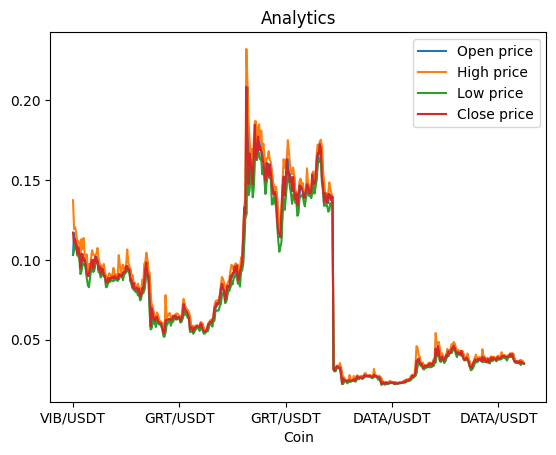

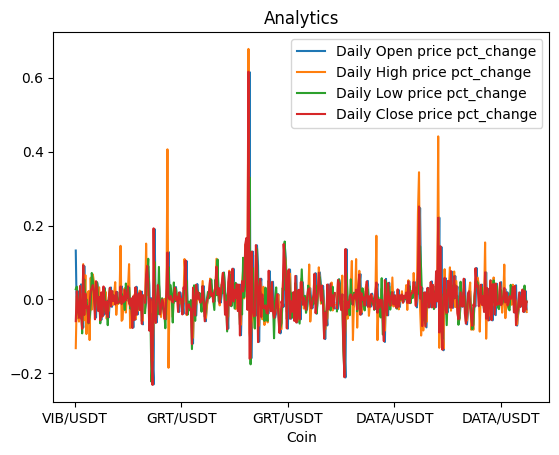

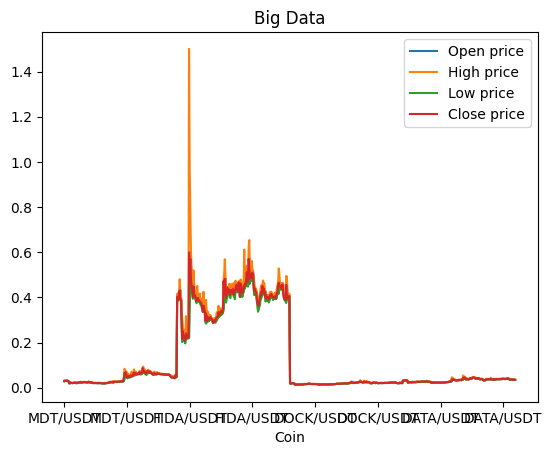

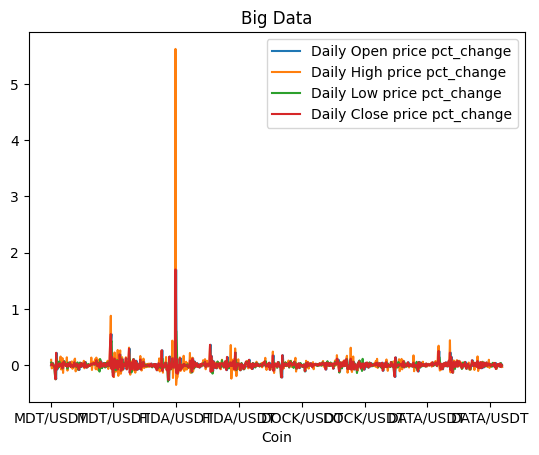

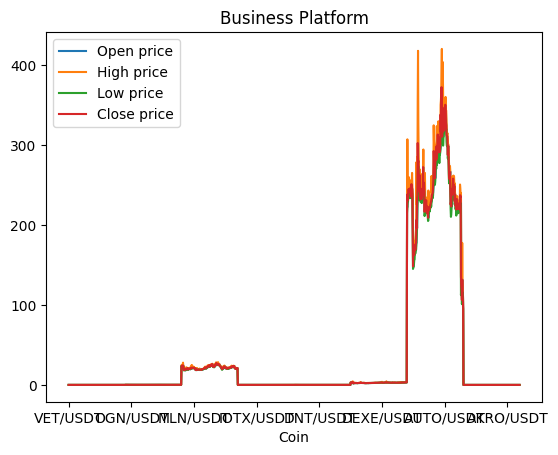

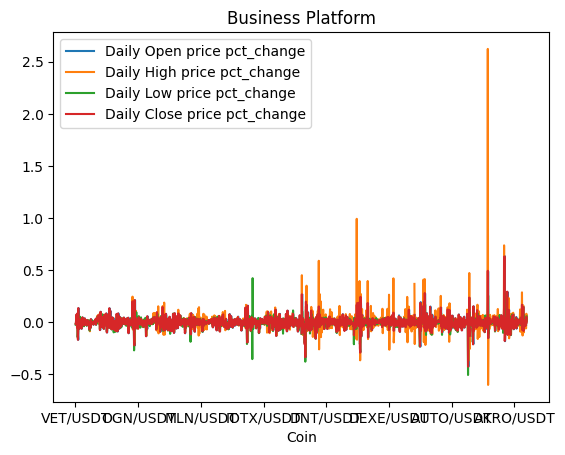

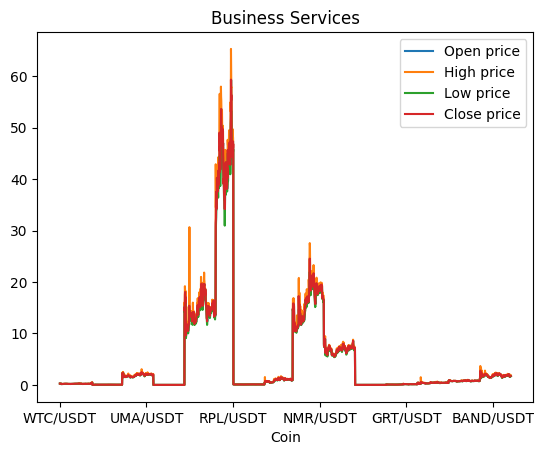

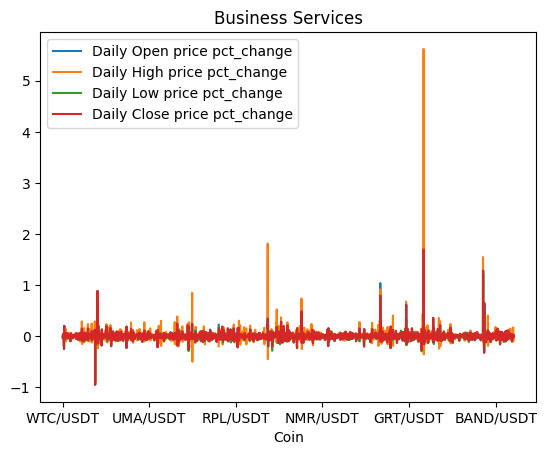

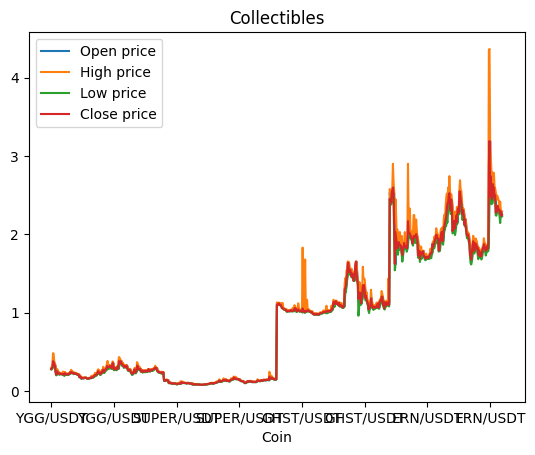

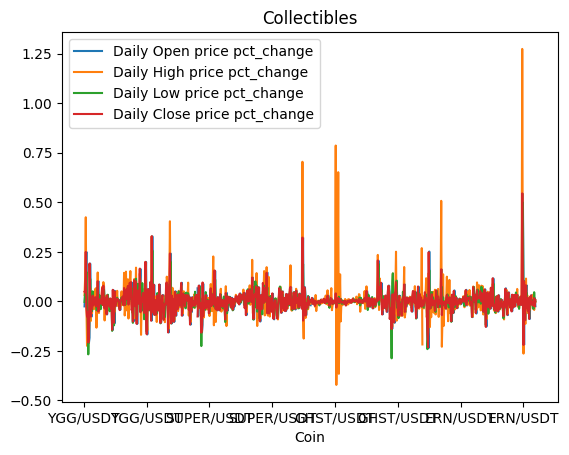

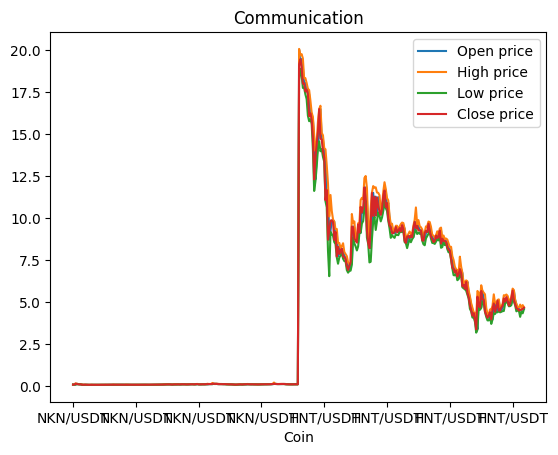

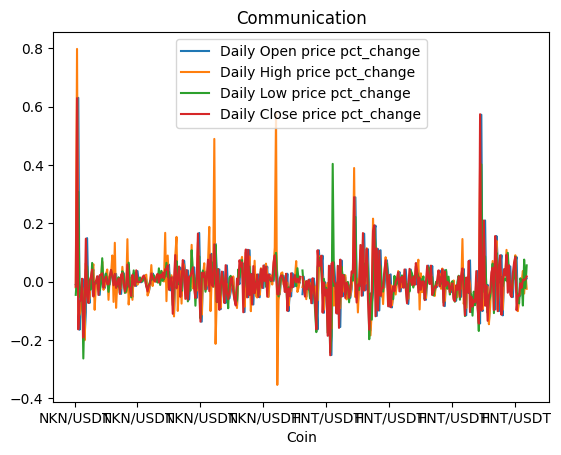

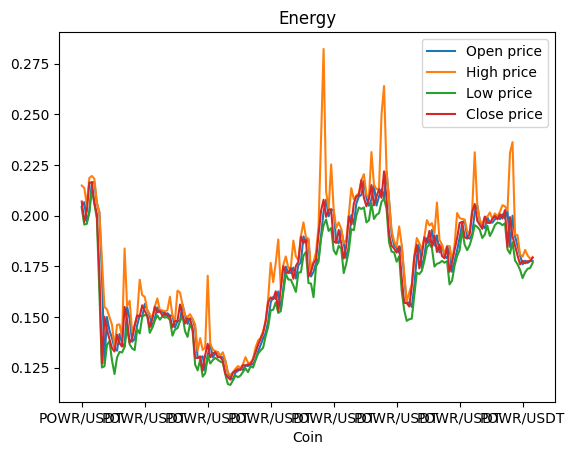

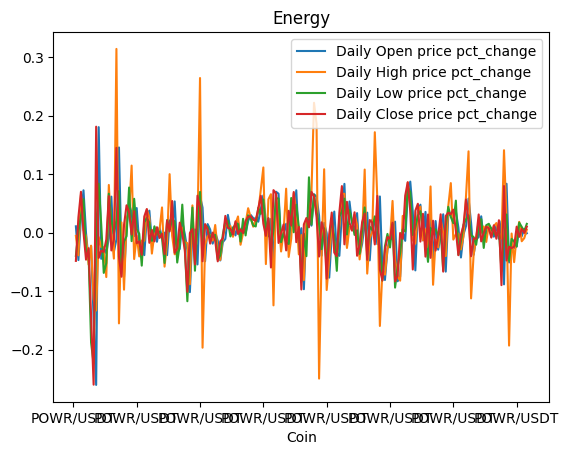

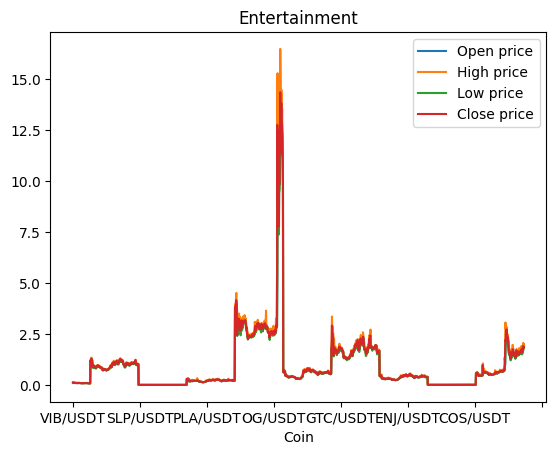

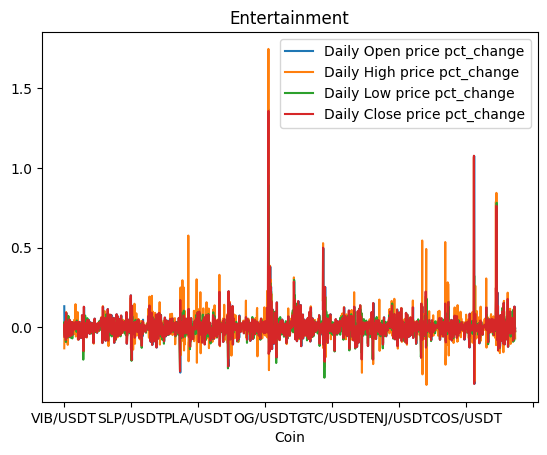

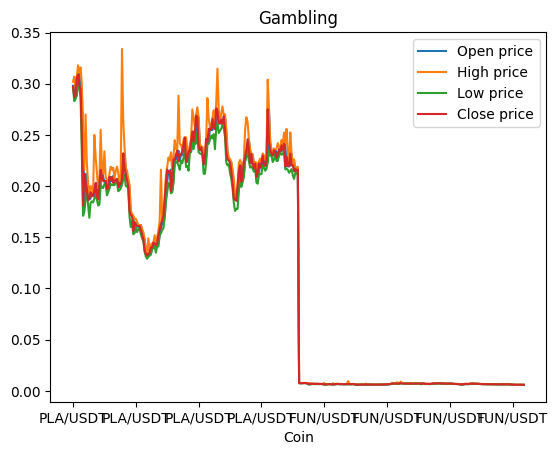

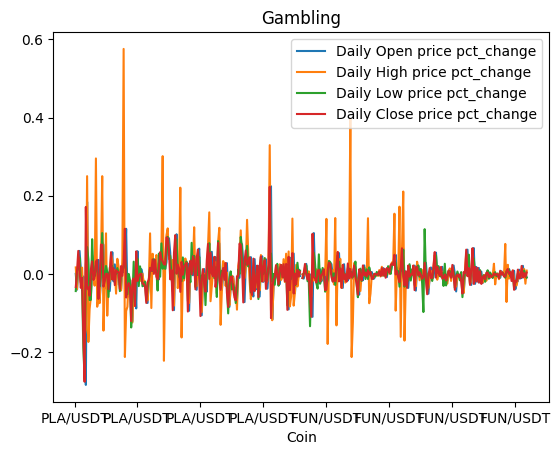

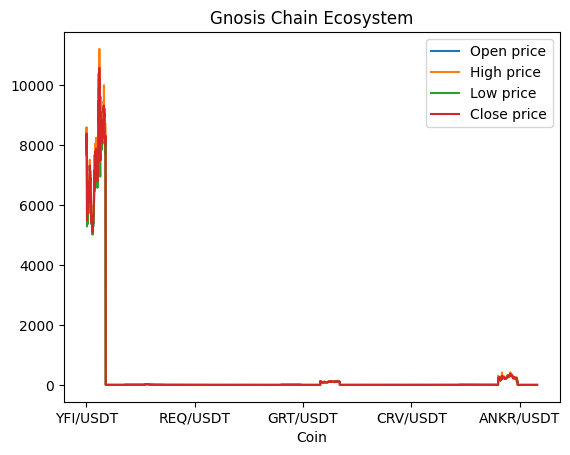

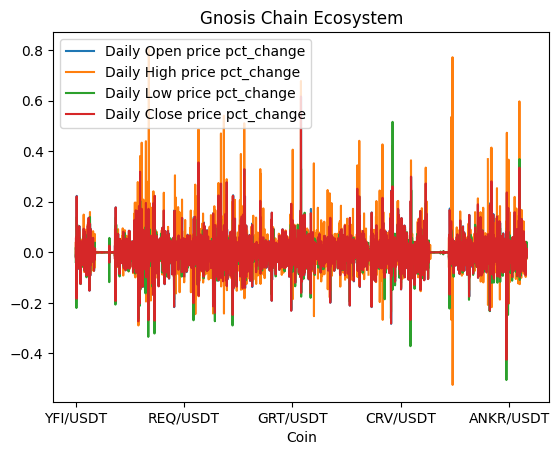

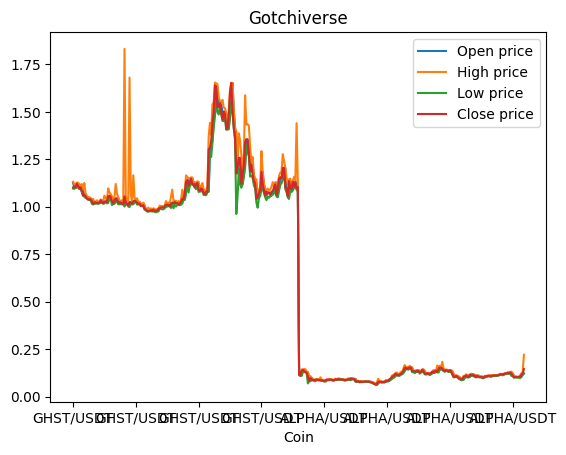

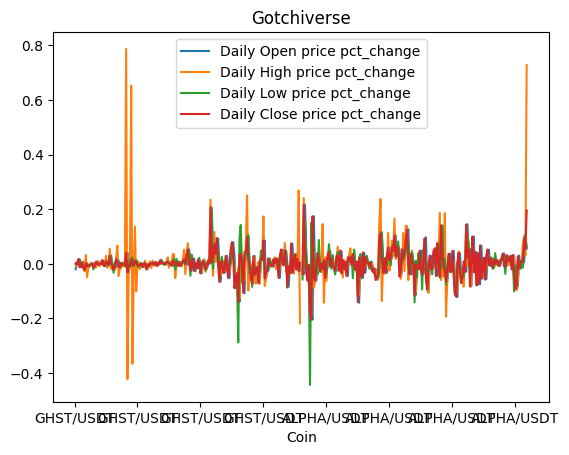

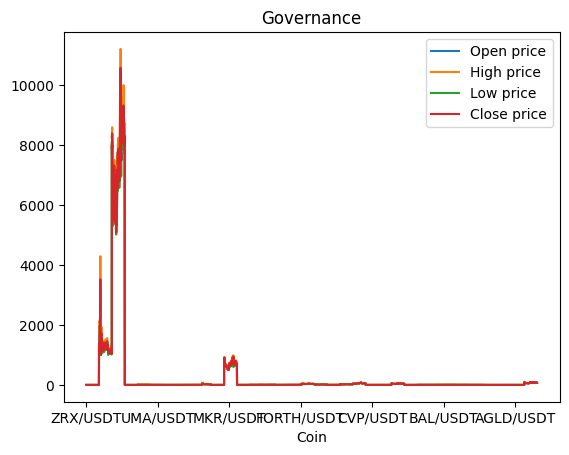

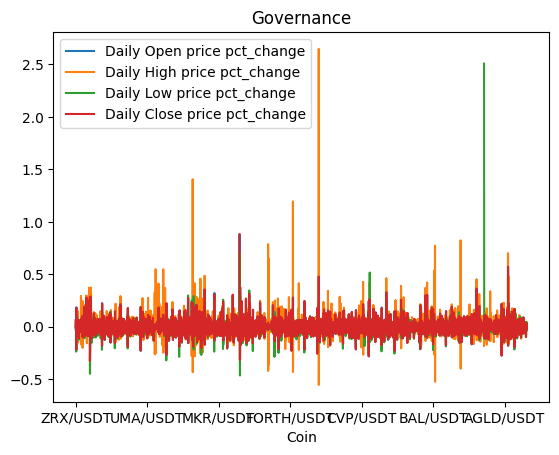

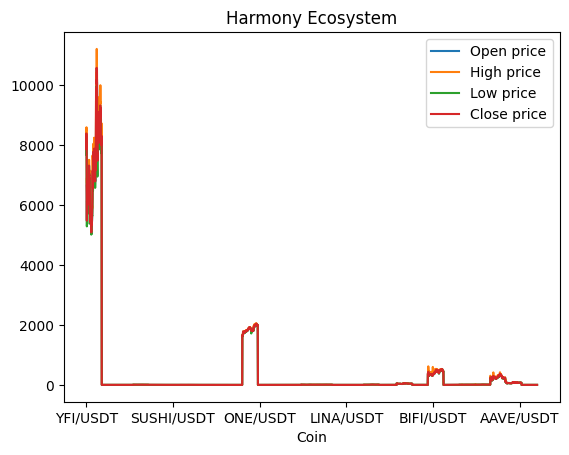

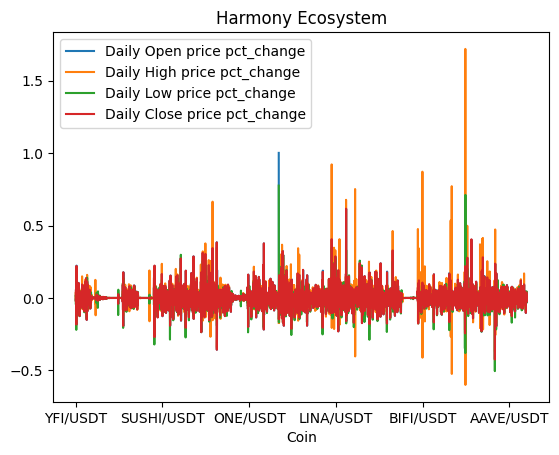

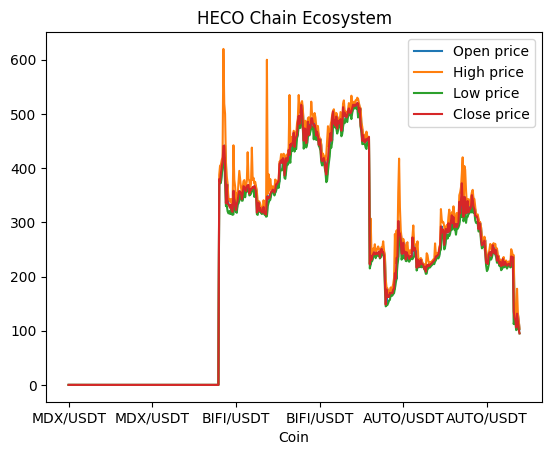

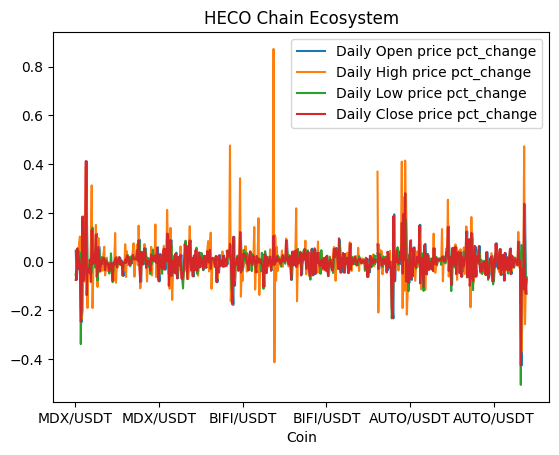

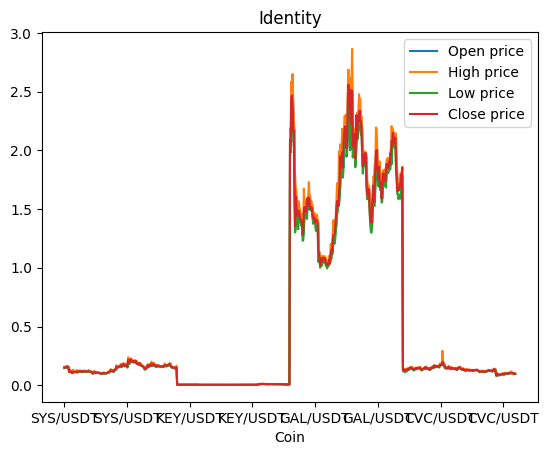

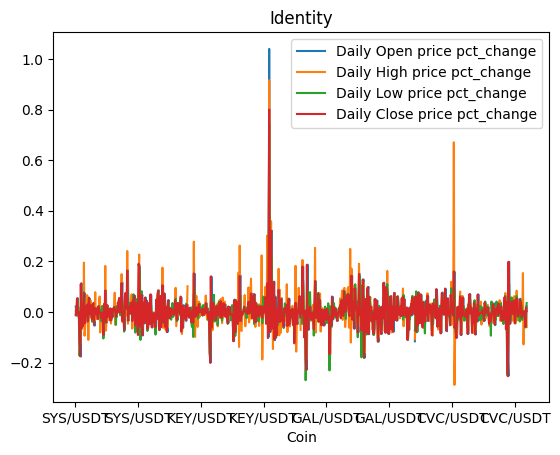

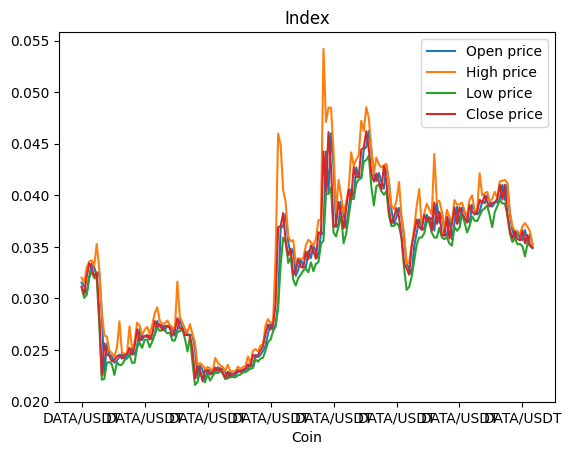

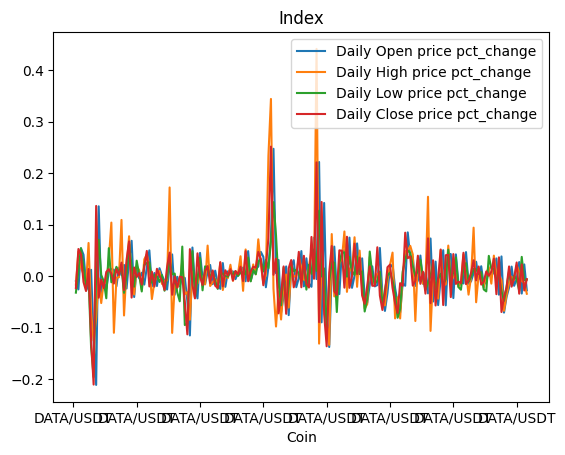

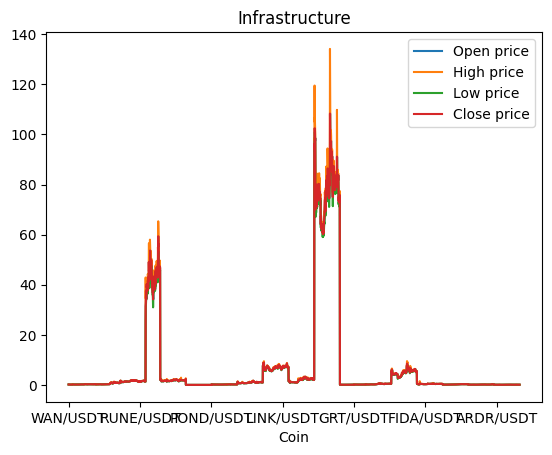

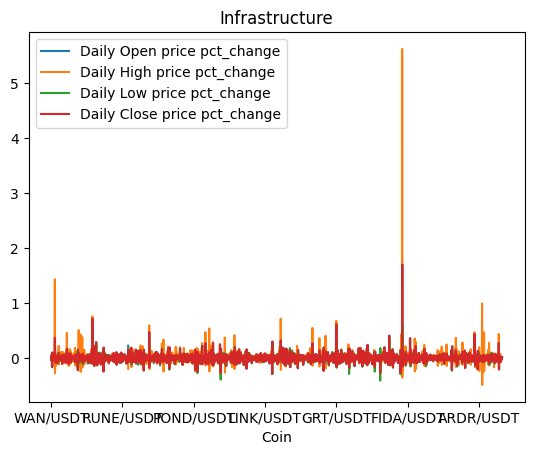

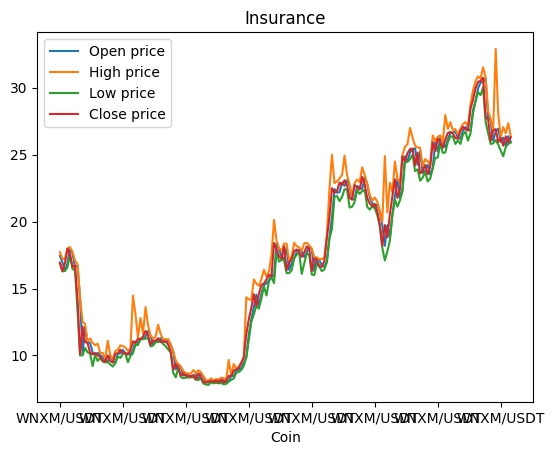

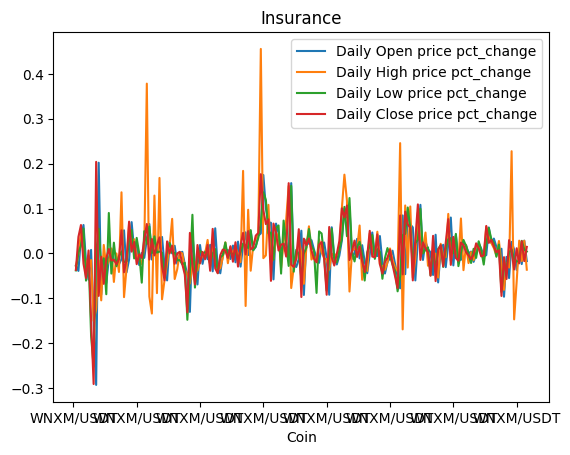

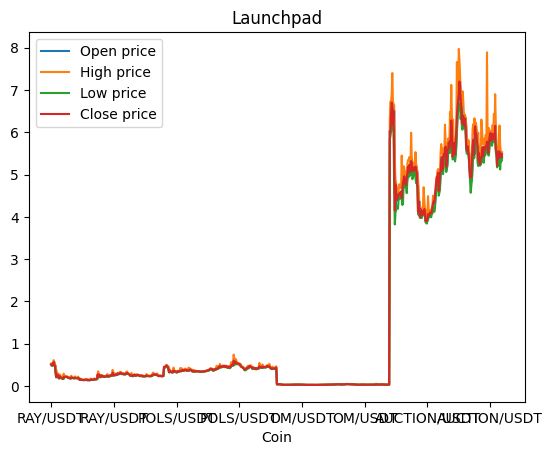

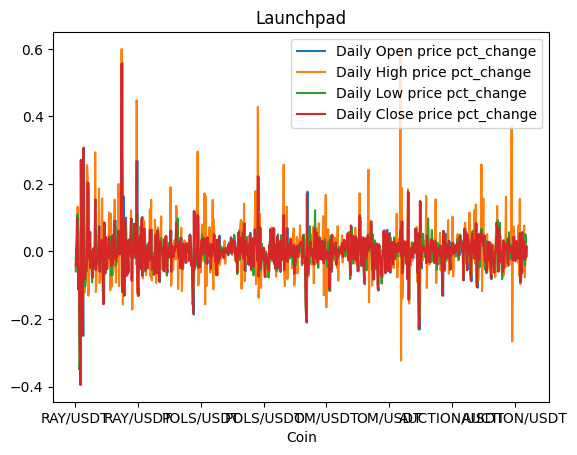

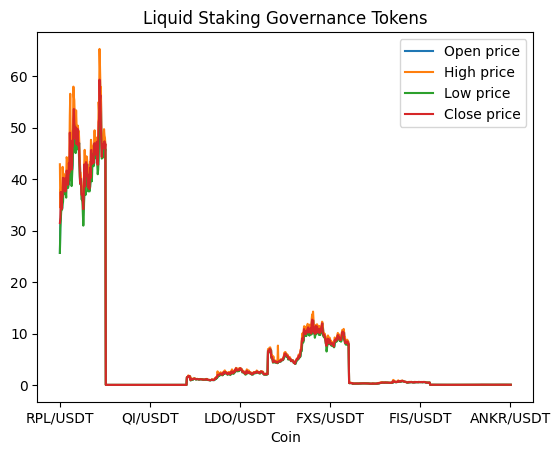

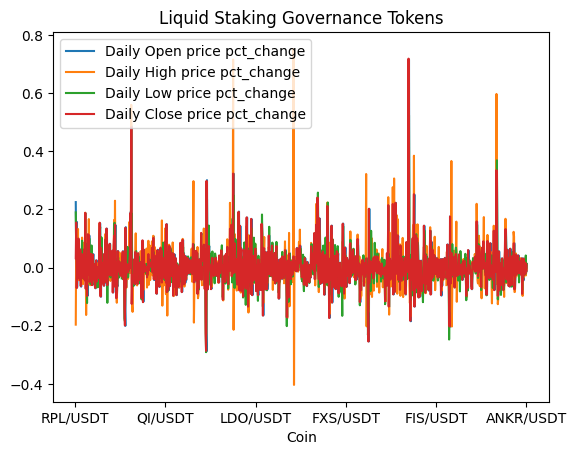

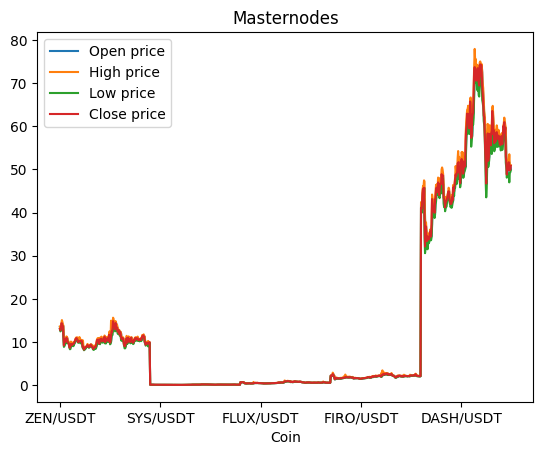

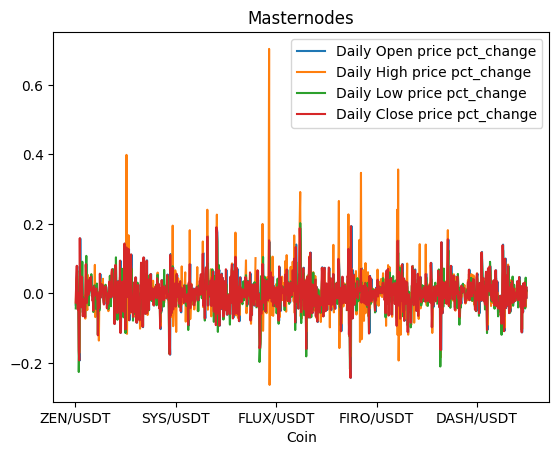

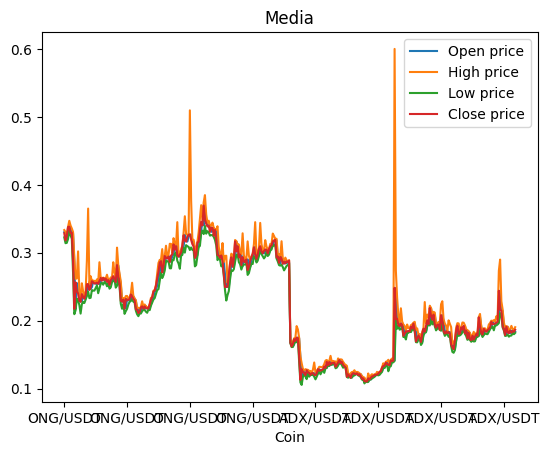

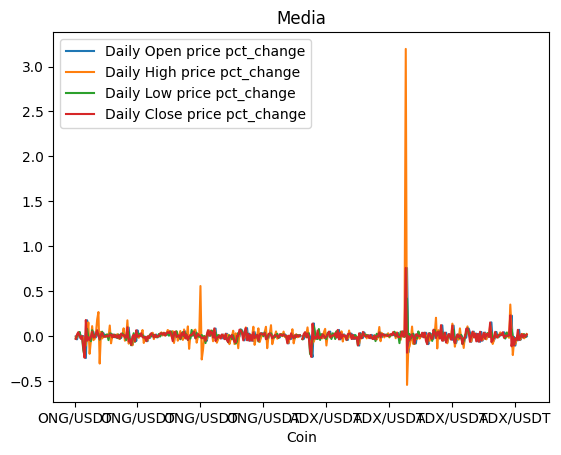

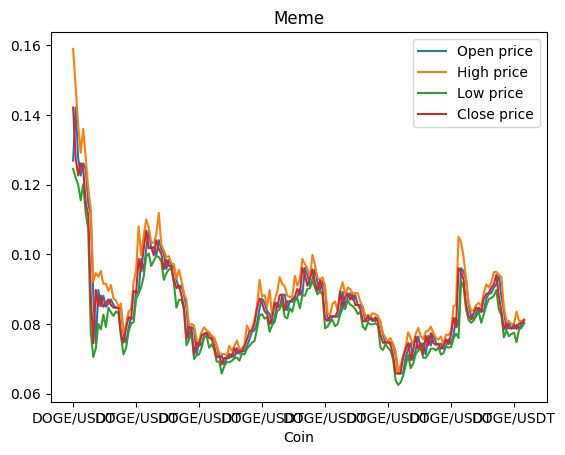

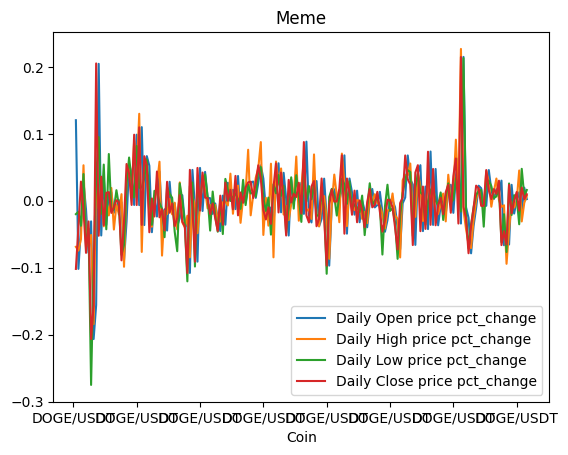

In [19]:
for column in ["Open price", "High price","Low price","Close price","Volume"]:
    all_coin_data_df = all_coin_data_df.astype({column: float})
category_average_details = dict()
for category, coins_in_category in transfromed_coins_by_category.items():
    category_average_details.update({category:{}})
    # selecting rows based on condition
    result_df = all_coin_data_df[all_coin_data_df['Coin'].isin(coins_in_category)]
    if result_df.empty:
        continue
    category_df = pd.DataFrame()
    for column in ["Open price", "High price","Low price","Close price"]:
        output_column_name = f"Daily {column} pct_change"
        category_df["Kline open time"] = result_df["Kline open time"]
        category_df["Coin"] = result_df["Coin"]
        category_df[column] = result_df[column]
        category_df[output_column_name] = result_df.groupby("Coin")[column].pct_change()
        category_average_details[category].update({f"Average {column} pct_change": category_df[output_column_name].mean()})
    category_df.to_csv(f"./output_files/category_wise_{category.lower()}_coin_data.csv")
    category_df[["Open price", "High price","Low price","Close price", "Coin"]].plot.line(title=category, x="Coin")
    category_df[["Daily Open price pct_change", "Daily High price pct_change","Daily Low price pct_change","Daily Close price pct_change", "Coin"]].plot.line(title=category, x="Coin")
    

# Get the average of % change on a category basis for the last 6 months

In [20]:
# Average percentage of change for the last 6 months
pd.DataFrame(category_average_details).transpose()

,Average Open price pct_change,Average High price pct_change,Average Low price pct_change,Average Close price pct_change
Analytics,0.002376,0.002050,0.001840,0.002199
Big Data,0.003786,0.009238,0.002450,0.003857
Business Platform,0.000095,0.002516,-0.000277,0.000287
Business Services,0.002661,0.004775,0.002141,0.002861
Charity,NaN,NaN,NaN,NaN
Collectibles,0.001225,0.003349,0.000958,0.001289
Communication,-0.000878,-0.000024,-0.001390,-0.000633
Education,NaN,NaN,NaN,NaN
Energy,0.000340,0.001391,0.000118,0.000321
Entertainment,0.002841,0.003631,0.002031,0.002791
